# Victor Vinicius de Lima Cunha - E01066

## I PROVA PARCIAL - 25.0
## INTELIGENCIA ARTIFICIAL - PROF. FISCHER STEFAN

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Salary.csv')

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


#### QUESTÃO 1 - Reproduza o gráfico abaixo e explique a correlação dos dados #### entre salário e anos de experiência

<span style="color: #FFCCCB;">Os dados apresentam uma correlação positiva e não é aparente a presença de outliers nos dados.</span>

<span style="color: #FFCCCB;">Pode-se perceber com os dados, que quanto mais anos de experiência, maior tende a ser o salário.</span>

<AxesSubplot:xlabel='Salary', ylabel='YearsExperience'>

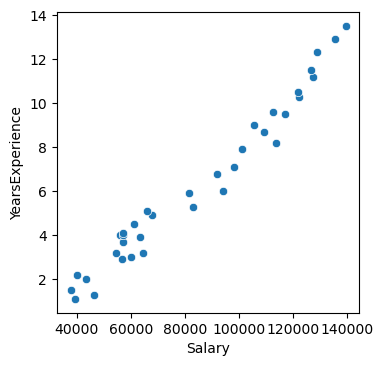

In [11]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 3.9,3.9
sns.scatterplot(x='Salary', y='YearsExperience', data=df, )
#plt.scatter(x=df['Salary'], y=df['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='YearsExperience'>

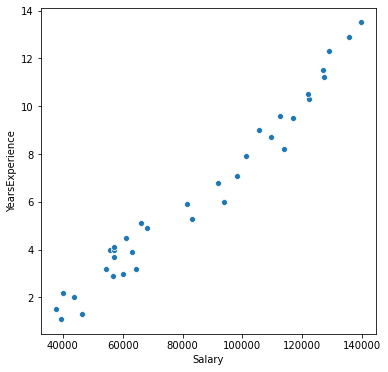

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [13]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_data = df.iloc[:,:-1].values
y_data = df.iloc[:,-1].values

#### Questão 2 - Treine a base de dados e gere as métricas de acerto
#### usando Regressão Linear, replicando resultado abaixo.

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=101)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
y_pred

array([ 80885.0981995 ,  56748.8141313 ,  88930.52622223, 148824.26816923,
       128263.72988891, 113066.81029042, 108597.12805557, 113960.74673739,
       138097.03080559,  41551.89453281, 120218.30186618])

In [17]:
y_pred


array([ 80885.0981995 ,  56748.8141313 ,  88930.52622223, 148824.26816923,
       128263.72988891, 113066.81029042, 108597.12805557, 113960.74673739,
       138097.03080559,  41551.89453281, 120218.30186618])

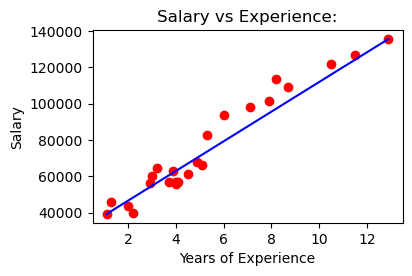

In [61]:

mylist = []
for entry in X_train:
    mylist.append(entry[0])
#plt.scatter(mylist, y_train, )
#sns.scatterplot(x=mylist, y=y_train, )
plt.figure(figsize=(4, 2.5))
plt.scatter(mylist, y_train, color='red', marker='o')
plt.plot([min(mylist), max(mylist)], [min(y_train), max(y_train)], color='blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience:')

plt.show()



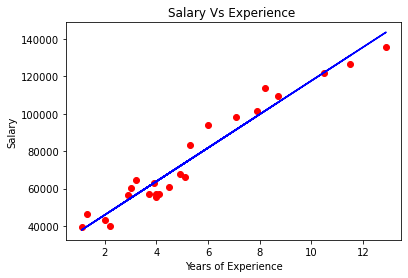

In [27]:
from sklearn import metrics
print("R2_Score: ",np.sqrt(metrics.r2_score(y_test,y_pred)), '\n')

print("Mean Absolute Error(MAE) :",metrics.mean_absolute_error(y_test, y_pred), '\n')

print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, y_pred))


R2_Score:  0.9887241685157637 

Mean Absolute Error(MAE) : 3585.079612952305 

Mean Squared Error(MSE): 21303651.024398852


R2_Score: 0.9775754814071884

Mean Absolute Error(MAE) : 3585.079612952305

Mean Squared Error(MSE): 21303651.024398852


# Logistic Regression

In [57]:
#X represents the size of a tumor in centimeters.
X = np.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)

#Note: X has to be reshaped into a column from a row for the LogisticRegression() function to work.
#y represents whether or not the tumor is cancerous (0 for "No", 1 for "Yes").
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]) 

In [62]:


from sklearn import linear_model


#### Questão 3 - Treine a base de dados para que ela decida se dado um input, #### consigamos premeditar se representa cancerígeno ou não.

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [70]:
#predict if tumor is cancerous where the size is 3.46mm:
predicted = logmodel.predict(np.array([3.46]).reshape(-1,1))


In [71]:
predicted

array([0])

In [28]:
predicted

array([0])

#### Questão 4 - Imprima a matriz de confusão e o relatório de classificação 
#### para verificar o grau de acerto. Explique a matriz de confusão e o grau
#### ,probabilístico, de acerto.

In [72]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print('\n')
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))



[[2 0]
 [0 2]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



<span style="color: #FFCCCB;">Como a quantidade de dados a serem processados é muito baixa, acabamos com 100% de acerto, o que pode ser visto na matriz de confusão que não possui nenhum falso negativo, nem falso positivo.
Isso também pode ser visto no classification_report, onde temos um f1-score de 1, além de que o precision também tem valor de 1, e como o precision significa  dentre todas as
classificações de classe positiva que o modelo fez, quantas estão corretas. Podemos afirmar que houve 100% de acerto. no entanto isso não significa que o modelo é perfeito, uma escolha diferente de samples para treino e teste poderiam causar uma precisão menor do modelo.</span>


[[132  17]
 [ 11 140]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       149
           1       0.89      0.93      0.91       151

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



# K Nearest Neighbors with Python

In [87]:
df = pd.read_csv("Classified Data",index_col=0)

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [89]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [90]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


## Train Test Split

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30)

In [100]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn = KNeighborsClassifier(n_neighbors=1)

In [101]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [102]:
pred = knn.predict(X_test)
pred

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0], d

#### Questão 5 - 
#### a) Imprimir o resultado abaixo

In [103]:
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))



[[134  19]
 [  4 143]]


              precision    recall  f1-score   support

           0       0.97      0.88      0.92       153
           1       0.88      0.97      0.93       147

    accuracy                           0.92       300
   macro avg       0.93      0.92      0.92       300
weighted avg       0.93      0.92      0.92       300



[[138   9]
 [ 11 142]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       147
           1       0.94      0.93      0.93       153

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



#### b) Explique o que o código abaixo imprime, o motivo de se imprimir o
#### gráfico (o que está sendo analisado) e a importância do parâmetro K e seu
#### significado

<span style="color: #FFCCCB;">o código abaixo imprime um lineplot que representa a taxa de erro do modelo treinado para cada valor de K no range de 1 a 40,</span>

<span style="color: #FFCCCB;">é interessante de se imprimir o gráfico para que se possa ter uma visualização mais intuitiva da informação que se quer obter, nesse caso, a informação sendo qual valor de K, nos dá a menor taxa de erro. K sendo o número de exemplos mais próximos do testado a serem considerados no processo de rotular o resultado do teste.</span>



In [104]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Text(0, 0.5, 'Error Rate')

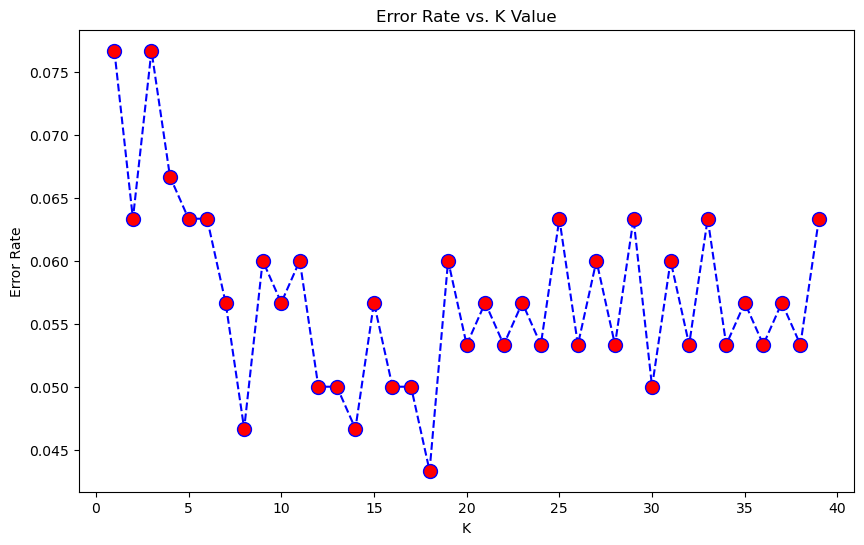

In [105]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')